# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
output_data_file_2 = "../output_data/cities_clean.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
plt.ioff() 

In [2]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [4]:
#assign list variables to build data table.
City = []
Lat = []
Lng = []
Max_Temp= []
Humidity= []
Cloudiness= []
Wind_Speed= []
Country = []
Date = []

In [5]:
cities

['bredasdorp',
 'san patricio',
 'itaituba',
 'qaanaaq',
 'leningradskiy',
 'arraial do cabo',
 'changtu',
 'hilo',
 'illoqqortoormiut',
 'butaritari',
 'altamira',
 'sergach',
 'saint-philippe',
 'ilam',
 'itea',
 'camacha',
 'waddan',
 'ushuaia',
 'zeya',
 'shingu',
 'tazovskiy',
 'busselton',
 'yellowknife',
 'chuy',
 'vaini',
 'sentyabrskiy',
 'baykit',
 'clyde river',
 'albany',
 'ribeira grande',
 'east london',
 'gazli',
 'avarua',
 'nouakchott',
 'thompson',
 'carnarvon',
 'port macquarie',
 'lucapa',
 'beaumont',
 'cape town',
 'uribia',
 'murdochville',
 'grootfontein',
 'salta',
 'powell',
 'mataura',
 'punta arenas',
 'monze',
 'iqaluit',
 'tasiilaq',
 'kruisfontein',
 'mahebourg',
 'jamestown',
 'kapaa',
 'halifax',
 'saint anthony',
 'xuanzhou',
 'barrow',
 'kastamonu',
 'selfoss',
 'bilma',
 'clarence town',
 'belushya guba',
 'victoria',
 'akyab',
 'san jose de guanipa',
 'rikitea',
 'esperance',
 'krasnoselkup',
 'codrington',
 'puerto ayora',
 'ayan',
 'hasaki',
 'ata

In [6]:
#cities = ['new norfolk', 'barrow', 'barentsburg', 'staromaryevka', 'thompson', 'yumen', 'bathsheba',\
# 'ushuaia', 'yar-sale', 'nishihara', 'leningradskiy', 'iqaluit', 'severo-kurilsk']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
group_item_number = np.uint8(5)
i = np.uint8(0)
j = np.uint8(0)
item = np.uint16(0)
if len(cities)%group_item_number:
    group_number = int(len(cities) / group_item_number) + 1
else:
    group_number = len(cities) / group_item_number

for i in range(0, group_number):
    j=0
    while ((j < group_item_number) & (item < (len(cities)-1))):

        item = i * (group_item_number) + j
        city = cities[item]
        print(f'Processing record {item} of group {i} item {j} | {city}')
        try:
            response = requests.get(query_url + city).json()
            #City.append()
            Lat.append(response['coord']['lat'])
            Lng.append(response['coord']['lon'])
            Max_Temp.append(response['main']['temp_max'])
            Humidity.append(response['main']['humidity'])
            Cloudiness.append(response['clouds']['all'])
            Wind_Speed.append(response['wind']['speed'])
            Country.append(response['sys']['country'])
            Date.append(response['dt'])
        except KeyError:
            print('Data for ',city,' not available.  Skipping......')
            Lat.append(np.nan)
            Lng.append(np.nan)
            Max_Temp.append(np.nan)
            Humidity.append(np.nan)
            Cloudiness.append(np.nan)
            Wind_Speed.append(np.nan)
            Country.append(np.nan)
            Date.append(np.nan)
        j = j + 1

Processing record 0 of group 0 item 0 | bredasdorp
Processing record 1 of group 0 item 1 | san patricio
Processing record 2 of group 0 item 2 | itaituba
Processing record 3 of group 0 item 3 | qaanaaq
Processing record 4 of group 0 item 4 | leningradskiy
Processing record 5 of group 1 item 0 | arraial do cabo
Processing record 6 of group 1 item 1 | changtu
Processing record 7 of group 1 item 2 | hilo
Processing record 8 of group 1 item 3 | illoqqortoormiut
Data for  illoqqortoormiut  not available.  Skipping......
Processing record 9 of group 1 item 4 | butaritari
Processing record 10 of group 2 item 0 | altamira
Processing record 11 of group 2 item 1 | sergach
Processing record 12 of group 2 item 2 | saint-philippe
Processing record 13 of group 2 item 3 | ilam
Processing record 14 of group 2 item 4 | itea
Processing record 15 of group 3 item 0 | camacha
Processing record 16 of group 3 item 1 | waddan
Processing record 17 of group 3 item 2 | ushuaia
Processing record 18 of group 3 item

Processing record 154 of group 30 item 4 | dunedin
Processing record 155 of group 31 item 0 | saint-pierre
Processing record 156 of group 31 item 1 | dalvik
Processing record 157 of group 31 item 2 | sisimiut
Processing record 158 of group 31 item 3 | pulandian
Processing record 159 of group 31 item 4 | cervo
Processing record 160 of group 32 item 0 | santa cruz
Processing record 161 of group 32 item 1 | buraydah
Processing record 162 of group 32 item 2 | fortuna
Processing record 163 of group 32 item 3 | roald
Processing record 164 of group 32 item 4 | abu samrah
Processing record 165 of group 33 item 0 | upernavik
Processing record 166 of group 33 item 1 | hals
Processing record 167 of group 33 item 2 | ulaangom
Processing record 168 of group 33 item 3 | kiunga
Processing record 169 of group 33 item 4 | annau
Processing record 170 of group 34 item 0 | kavaratti
Processing record 171 of group 34 item 1 | valentin gomez farias
Processing record 172 of group 34 item 2 | tuy hoa
Processi

Processing record 299 of group 59 item 4 | sept-iles
Processing record 300 of group 60 item 0 | harper
Processing record 301 of group 60 item 1 | san jeronimo
Processing record 302 of group 60 item 2 | tezu
Processing record 303 of group 60 item 3 | puerto madryn
Processing record 304 of group 60 item 4 | asau
Processing record 305 of group 61 item 0 | mehamn
Processing record 306 of group 61 item 1 | saleaula
Data for  saleaula  not available.  Skipping......
Processing record 307 of group 61 item 2 | carberry
Processing record 308 of group 61 item 3 | alice springs
Processing record 309 of group 61 item 4 | aljezur
Processing record 310 of group 62 item 0 | lingolsheim
Processing record 311 of group 62 item 1 | avera
Processing record 312 of group 62 item 2 | villa carlos paz
Processing record 313 of group 62 item 3 | nykobing
Data for  nykobing  not available.  Skipping......
Processing record 314 of group 62 item 4 | cockburn town
Processing record 315 of group 63 item 0 | kalomo
D

Processing record 443 of group 88 item 3 | mandalgovi
Processing record 444 of group 88 item 4 | kharan
Processing record 445 of group 89 item 0 | walvis bay
Processing record 446 of group 89 item 1 | lorengau
Processing record 447 of group 89 item 2 | wamba
Processing record 448 of group 89 item 3 | otjiwarongo
Processing record 449 of group 89 item 4 | meadow lake
Processing record 450 of group 90 item 0 | camiri
Processing record 451 of group 90 item 1 | lazaro cardenas
Processing record 452 of group 90 item 2 | duzici
Data for  duzici  not available.  Skipping......
Processing record 453 of group 90 item 3 | tawnat
Data for  tawnat  not available.  Skipping......
Processing record 454 of group 90 item 4 | kinablangan
Processing record 455 of group 91 item 0 | manzanillo
Processing record 456 of group 91 item 1 | sumenep
Processing record 457 of group 91 item 2 | ranong
Processing record 458 of group 91 item 3 | beloha
Processing record 459 of group 91 item 4 | hofn
Processing recor

Processing record 583 of group 116 item 3 | alihe
Processing record 584 of group 116 item 4 | constantine
Processing record 585 of group 117 item 0 | ituni
Data for  ituni  not available.  Skipping......
Processing record 586 of group 117 item 1 | aswan
Processing record 587 of group 117 item 2 | neos pirgos
Data for  neos pirgos  not available.  Skipping......
Processing record 588 of group 117 item 3 | rawson
Processing record 589 of group 117 item 4 | higuey
Data for  higuey  not available.  Skipping......
Processing record 590 of group 118 item 0 | merced
Processing record 591 of group 118 item 1 | shihezi
Processing record 592 of group 118 item 2 | vila franca do campo
Processing record 593 of group 118 item 3 | guerrero negro
Processing record 594 of group 118 item 4 | axim
Processing record 595 of group 119 item 0 | pangai
Processing record 596 of group 119 item 1 | namibe
Processing record 597 of group 119 item 2 | cagayan de tawi-tawi
Data for  cagayan de tawi-tawi  not availa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
main_df = pd.DataFrame({'city' : cities, 'Latitude' : Lat, 'Longitude': Lng, "Max temp, F": Max_Temp, "Humidity %" : Humidity, \
            "Cloudiness" : Cloudiness, 'Wind Speed, mph' : Wind_Speed, 'Country' : Country , 'Date' : Date})
len(main_df)
main_df

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date
0,bredasdorp,-34.53,20.04,53.60,76.0,55.0,3.15,ZA,1.592933e+09
1,san patricio,19.22,-104.70,91.40,70.0,20.0,11.41,MX,1.592934e+09
2,itaituba,-4.28,-55.98,95.00,44.0,20.0,4.70,BR,1.592934e+09
3,qaanaaq,77.48,-69.36,38.19,84.0,6.0,0.54,GL,1.592933e+09
4,leningradskiy,69.38,178.42,32.20,96.0,100.0,14.76,RU,1.592933e+09
...,...,...,...,...,...,...,...,...,...
629,pringsewu,-5.36,104.97,72.28,92.0,78.0,2.10,ID,1.592934e+09
630,anadyr,64.75,177.48,48.20,93.0,40.0,8.95,RU,1.592934e+09
631,kavieng,-2.57,150.80,82.83,78.0,44.0,10.13,PG,1.592933e+09
632,porto velho,-8.76,-63.90,91.40,46.0,40.0,6.93,BR,1.592934e+09


In [9]:
#clean up data by removing rows with NaN
main_df = main_df.drop(labels = main_df[pd.isna(main_df['Latitude'])]['Latitude'].index)
main_df.reset_index(drop = True)

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date
0,bredasdorp,-34.53,20.04,53.60,76.0,55.0,3.15,ZA,1.592933e+09
1,san patricio,19.22,-104.70,91.40,70.0,20.0,11.41,MX,1.592934e+09
2,itaituba,-4.28,-55.98,95.00,44.0,20.0,4.70,BR,1.592934e+09
3,qaanaaq,77.48,-69.36,38.19,84.0,6.0,0.54,GL,1.592933e+09
4,leningradskiy,69.38,178.42,32.20,96.0,100.0,14.76,RU,1.592933e+09
...,...,...,...,...,...,...,...,...,...
569,roma,43.21,-75.46,87.80,45.0,20.0,16.11,US,1.592934e+09
570,pringsewu,-5.36,104.97,72.28,92.0,78.0,2.10,ID,1.592934e+09
571,anadyr,64.75,177.48,48.20,93.0,40.0,8.95,RU,1.592934e+09
572,kavieng,-2.57,150.80,82.83,78.0,44.0,10.13,PG,1.592933e+09


In [10]:
main_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#there are no cities with humidity over 100%
main_df.loc[(main_df['Humidity %'] > 100)][:]

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date


In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = main_df.loc[(main_df['Humidity %'] > 100)].index
humidity_index

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = main_df.drop(index = humidity_index)
clean_city_data

,city,Latitude,Longitude,"Max temp, F",Humidity %,Cloudiness,"Wind Speed, mph",Country,Date
0,bredasdorp,-34.53,20.04,53.60,76.0,55.0,3.15,ZA,1.592933e+09
1,san patricio,19.22,-104.70,91.40,70.0,20.0,11.41,MX,1.592934e+09
2,itaituba,-4.28,-55.98,95.00,44.0,20.0,4.70,BR,1.592934e+09
3,qaanaaq,77.48,-69.36,38.19,84.0,6.0,0.54,GL,1.592933e+09
4,leningradskiy,69.38,178.42,32.20,96.0,100.0,14.76,RU,1.592933e+09
...,...,...,...,...,...,...,...,...,...
628,roma,43.21,-75.46,87.80,45.0,20.0,16.11,US,1.592934e+09
629,pringsewu,-5.36,104.97,72.28,92.0,78.0,2.10,ID,1.592934e+09
630,anadyr,64.75,177.48,48.20,93.0,40.0,8.95,RU,1.592934e+09
631,kavieng,-2.57,150.80,82.83,78.0,44.0,10.13,PG,1.592933e+09


In [14]:
#This line is here because I had one datapoint with a 800 mph wind speed.
clean_city_data.loc[clean_city_data['Wind Speed, mph'] > 100,'Wind Speed, mph'] = 0

In [15]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file_2, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

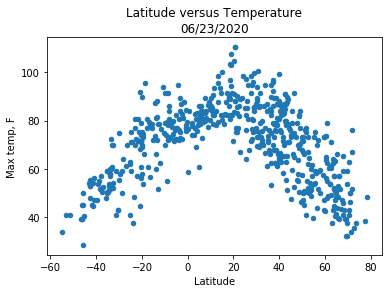

In [16]:
now = datetime.now()
date = now.strftime("%m/%d/%Y")
temperature_title = "Latitude versus Temperature\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Max temp, F', kind='scatter', title = temperature_title)
plt.show()

pretty clear correlation between latitude and temperature.

## Latitude vs. Humidity Plot

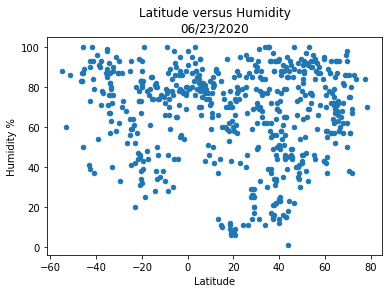

In [17]:
humidity_title = "Latitude versus Humidity\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Humidity %', kind='scatter', title = humidity_title)
plt.show()

Weak correlation between Humidity and latitude

## Latitude vs. Cloudiness Plot

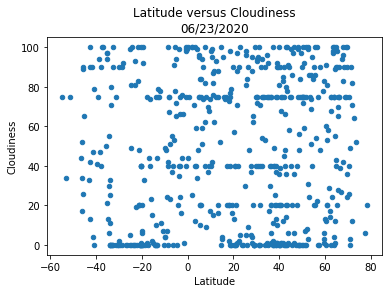

In [18]:
cloudiness_title = "Latitude versus Cloudiness\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Cloudiness', kind='scatter', title = cloudiness_title)
plt.show()

No correlation between latitude and Cloudiness

## Latitude vs. Wind Speed Plot

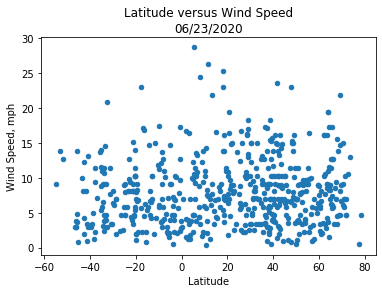

In [19]:
wind_speed_title = "Latitude versus Wind Speed\n"+date
clean_city_data.plot(x = 'Latitude', y = 'Wind Speed, mph', kind='scatter', title = wind_speed_title)
plt.show()

No correlation between Wind Speed and latitude

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values, graph_title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    plt.scatter(x = x_values, y = y_values)
    return

In [21]:
# Create Northern and Southern Hemisphere DataFrames
#I created a dataframe of dataframes.  One is 'north' and the other 'south'
city_north_df = clean_city_data.loc[clean_city_data['Latitude'] >= 0][:]
city_south_df = clean_city_data.loc[clean_city_data['Latitude'] <= 0][:]
city_north_df.head()
city_south_df.head()
data_df = {'North' : city_north_df, 'South' : city_south_df}

#### Generate all graphs

In [22]:
#these 2 lists are used in for loops to go through each graph possibility and plot it.
hemisphere_list = ['North', 'South']
y_axis_data_list = ['Max temp, F', 'Humidity %', 'Cloudiness', 'Wind Speed, mph']

In [23]:
#this function simply takes in the slope, intercept and max and min latitudes
#it returns the corresponding y_values for plotting
def y_values(slope, intercept, x_max, x_min):
    y_max = slope * x_max + intercept
    y_min = slope * x_min + intercept
    return (y_max, y_min)

In [24]:
#main graphing function to complete all graphs.
def graph_function(hemisphere, y_axis_data):
    plt.figure()
    plt.scatter(x = data_df[hemisphere]['Latitude'], y = data_df[hemisphere][y_axis_data])
    plt.title('{}ern Hemisphere - {} vs. Latitude\n Linear Regression'.format(hemisphere, y_axis_data))
    slope, intercept, r_value, p_value, std_err = linregress(x = data_df[hemisphere]['Latitude'], y = data_df[hemisphere][y_axis_data])
    r_squared = r_value ** 2
    x_max = data_df[hemisphere]['Latitude'].max()
    x_min = data_df[hemisphere]['Latitude'].min()
    y_max, y_min = y_values(slope, intercept, x_max, x_min)
    x_line = [x_max, x_min]
    y_line = [y_max, y_min]
    #print(y_max)
    plt.plot(x_line, y_line, color = 'red')
    text_equation = 'y = {:.2f} * x + {:.2f}\nr**2 = {:.4f}'.format(slope, intercept, r_squared)
    plt.text(x_min, y_max,text_equation, color = 'r', bbox=dict(facecolor='w', alpha=0.5))
    plt.legend(['correlation', 'raw data'] , bbox_to_anchor=(1.05, 1), loc = 'upper left')
    filename = "./plots/graph%sern_hemisphere_and_%s.png" % (hemisphere, y_axis_data)
    plt.savefig(filename, bbox_inches='tight')
    #this line is key to making the graphs plot one after another
    plt.show()


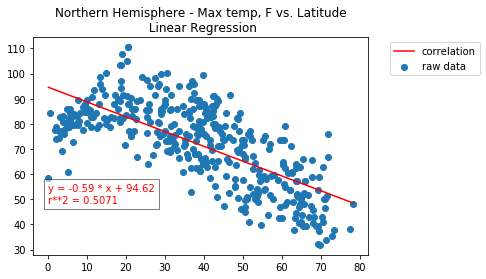

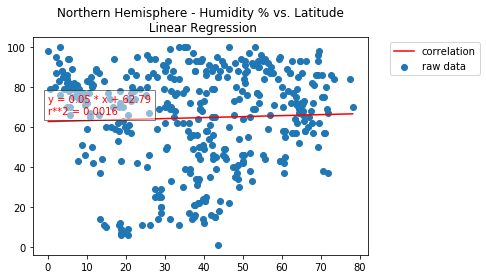

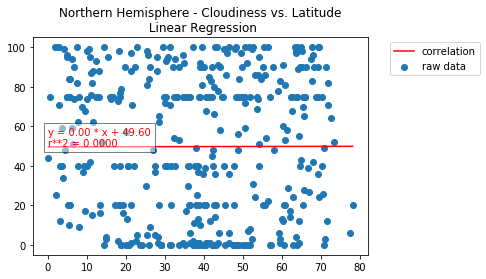

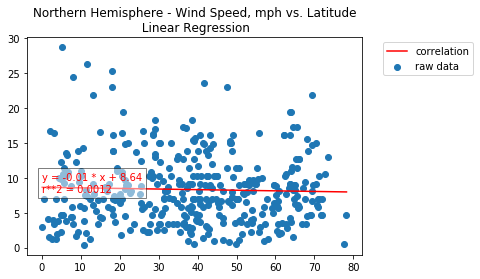

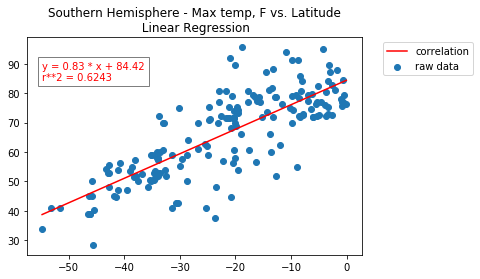

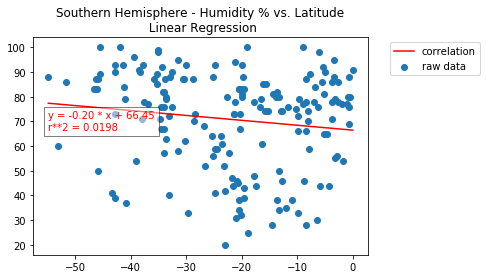

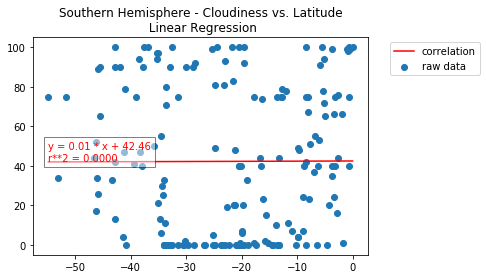

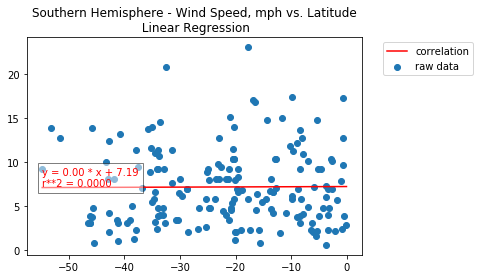

In [25]:
#This loop goes through both hemispheres and then all of the y-axis data that is required.
#values are defined in lists that that then reference the dataframe of dataframes.  One for nothern
#and one for southern hemispheres.
for hemisphere in hemisphere_list:
    for y_axis_data in y_axis_data_list:
        graph_function(hemisphere, y_axis_data)



The graphs pretty much speak for themselves.  Only observed correlation with Max Temperature.  All other variables seem to not correlate.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression